In [25]:
from sklearn.datasets import make_gaussian_quantiles # Importamos la función 'make_gaussian_quantiles' de Scikit-Learn
import numpy as np  # Importamos la biblioteca NumPy con el alias 'np'
import matplotlib.pyplot as plt  # Importamos la biblioteca matplotlib y utilizamos el alias 'plt'

In [26]:
# Definimos el número de muestras que generaremos
N = 1000

# Usamos 'make_gaussian_quantiles' para generar datos ficticios
gaussian_quantiles = make_gaussian_quantiles(
    mean=None,        # No especificamos un valor medio específico para las clases
    cov=0.1,          # Controla la covarianza de las clases
    n_samples=N,      # Número de muestras a generar
    n_features=2,     # Cada muestra tendrá dos características (bidimensional)
    n_classes=2,      # Establecemos que habrá dos clases diferentes
    shuffle=True,     # Barajamos aleatoriamente las muestras
    random_state=None  # Semilla para la generación de números aleatorios
)

# Extraemos las características (X) y las etiquetas de clase (Y) de los datos generados
X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]

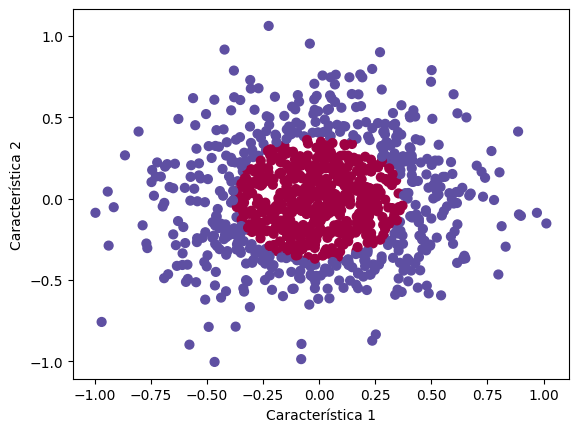

In [27]:
# Usamos la función 'scatter' para crear un gráfico de dispersión
# X[:, 0] se refiere a la primera característica de los datos X
# X[:, 1] se refiere a la segunda característica de los datos X
# c=Y[:, 0] se utiliza para asignar colores a las clases en función de las etiquetas Y
# s=40 establece el tamaño de los puntos en el gráfico
# cmap=plt.cm.Spectral define una paleta de colores para las clases
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], s=40, cmap=plt.cm.Spectral)

# Establecemos etiquetas para los ejes x e y
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

# Mostramos el gráfico
plt.show()

In [28]:
# Definimos la función de activación sigmoidal
def sigmoid(x, derivate=False):
    if derivate:
        # Si derivate es True, calculamos la derivada de la función sigmoidal
        return np.exp(-x) / ((np.exp(-x) + 1) ** 2)
    else:
        # Si derivate es False, calculamos la función sigmoidal
        return 1 / (1 + np.exp(-x))

# Definimos la función de activación ReLU (Rectified Linear Unit)
def relu(x, derivate=False):
    if derivate:
        # Si derivate es True, calculamos la derivada de la función ReLU
        x[x <= 0] = 0
        x[x > 0] = 1
        return x
    else:
        # Si derivate es False, calculamos la función ReLU
        return np.maximum(0, x)

In [29]:
# Definimos una función para calcular el Error Cuadrático Medio (MSE)
def mse(y, y_hat, derivate=False):
    if derivate:
        # Si 'derivate' es True, calculamos la derivada del MSE respecto a 'y_hat'
        # La derivada es simplemente la diferencia entre la predicción 'y_hat' y el valor real 'y'
        return (y_hat - y)
    else:
        # Si 'derivate' es False, calculamos el MSE entre 'y' y 'y_hat'
        # Elevamos al cuadrado la diferencia entre 'y' e 'y_hat' y luego calculamos el promedio
        return np.mean((y_hat - y) ** 2)

In [30]:
def initialize_parameters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0,L-1):
    parameters['W' + str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) -1
    parameters['b' + str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) -1
  return parameters

In [31]:
def train(X_data, lr, params, training=True):
    # Forward Propagation

    params['A0'] = X_data  # Capa de entrada, establecemos los datos de entrada

    # Capa 1
    params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']  # Cálculo de la entrada ponderada (Z1)
    params['A1'] = relu(params['Z1'])  # Aplicamos la función de activación ReLU (A1)

    # Capa 2
    params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']  # Cálculo de la entrada ponderada (Z2)
    params['A2'] = relu(params['Z2'])  # Aplicamos la función de activación ReLU (A2)

    # Capa 3 (Salida)
    params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']  # Cálculo de la entrada ponderada (Z3)
    params['A3'] = sigmoid(params['Z3'])  # Aplicamos la función de activación sigmoidal (A3)

    output = params['A3']  # La salida de la red

    if training:
        # Backpropagation (Retropropagación)

        # Cálculo de gradientes
        # Capa 3
        params['dZ3'] = mse(Y, output, True) * sigmoid(params['A3'], True)  # Gradiente local de la función de pérdida
        params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])  # Gradiente con respecto a los pesos W3

        # Capa 2
        params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)  # Gradiente local
        params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])  # Gradiente con respecto a los pesos W2

        # Capa 1
        params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)  # Gradiente local
        params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])  # Gradiente con respecto a los pesos W1

        # Gradiente Descendente (Gradient Descent)

        # Actualización de los pesos y sesgos de la Capa 3
        params['W3'] = params['W3'] - params['dW3'] * lr  # Actualización de pesos
        params['b3'] = params['b3'] - (np.mean(params['dZ3'], axis=0, keepdims=True)) * lr  # Actualización del sesgo

        # Actualización de los pesos y sesgos de la Capa 2
        params['W2'] = params['W2'] - params['dW2'] * lr  # Actualización de pesos
        params['b2'] = params['b2'] - (np.mean(params['dZ2'], axis=0, keepdims=True)) * lr  # Actualización del sesgo

        # Actualización de los pesos y sesgos de la Capa 1
        params['W1'] = params['W1'] - params['dW1'] * lr  # Actualización de pesos
        params['b1'] = params['b1'] - (np.mean(params['dZ1'], axis=0, keepdims=True)) * lr  # Actualización del sesgo

    # La función devuelve la salida de la red neuronal después de la actualización de pesos
    return output

0.26110351075756955
0.25150499489188294
0.24805883090988454
0.24520662547650732
0.24244492374284443
0.23945687136386415
0.23581563759875546
0.2309687619641003
0.22443587875034918
0.21771511214446493
0.21134079403136313
0.2046701841678515
0.19753754251137434
0.18939681124337074
0.18022431454416377
0.17027817277666035
0.15992846285976223
0.14960547488869053
0.13972956791510915
0.13049053221915988
0.1218908188535182
0.11391664170392753
0.10667611096099532
0.1001869191732824
0.0944292156981943
0.08936596567071692
0.08487738752209818
0.08089722699554852
0.07736771306961815
0.07419305351098496
0.07134651449912074
0.0687915232072912
0.06651019985822373
0.0644274130849377
0.06256215443632449
0.06086942048618626
0.059326963841058365
0.05792253569872868
0.056710906259501016
0.06325660553390773
0.07317768449776069
0.06568165988692126
0.07364534342285253
0.06492039766429195
0.07326143915574401
0.06396971789143338
0.07240331518737321
0.06294169235096868
0.07127041380864026
0.06186134949822223
0.069

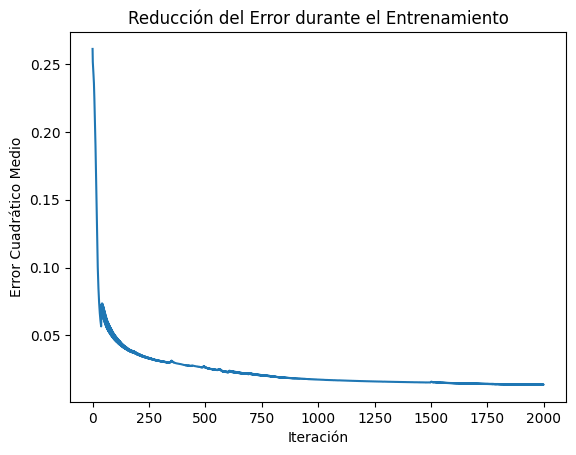

In [32]:
# Definimos la estructura de capas de la red neuronal (2 capas ocultas)
layer_dims = [2, 4, 8, 1]

# Inicializamos los parámetros de la red neuronal
params = initialize_parameters_deep(layer_dims)

# Creamos una lista para almacenar los errores durante el entrenamiento
errors = []

# Entrenamos la red durante 50,000 iteraciones
for _ in range(50000):
    # Realizamos el paso de entrenamiento de la red
    output = train(X, 0.001, params)

    # Calculamos y almacenamos el error cuadrático medio (MSE) cada 25 iteraciones
    if _ % 25 == 0:
        error = mse(Y, output)  # Calculamos el MSE entre las etiquetas reales (Y) y las predicciones (output)
        print(error)  # Imprimimos el error en esta iteración
        errors.append(error)  # Almacenamos el error en la lista 'errors'

# Visualizamos cómo disminuye el error durante el entrenamiento
plt.plot(errors)  # Dibujamos una gráfica de línea con los errores
plt.xlabel('Iteración')  # Etiqueta del eje x
plt.ylabel('Error Cuadrático Medio')  # Etiqueta del eje y
plt.title('Reducción del Error durante el Entrenamiento')  # Título del gráfico
plt.show()  # Mostramos el gráfico